In [55]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

In [56]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv("preprocessed_data.csv")

In [57]:
# Chọn các đặc trưng và nhãn
X = data[['size', 'rooms','category_name','area_name']]
y = data['price']  # Giá là nhãn cần dự đoán

In [58]:
# Đảm bảo định dạng đúng cho biến mục tiêu
y = y.astype(float)

In [59]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Khởi tạo một loạt các giá trị k để thử nghiệm
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

In [62]:
# Khởi tạo mô hình KNN
knn = KNeighborsRegressor()

In [63]:
# Tạo một đối tượng GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

In [64]:
# Tiến hành tìm kiếm trên lưới siêu tham số sử dụng dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error')

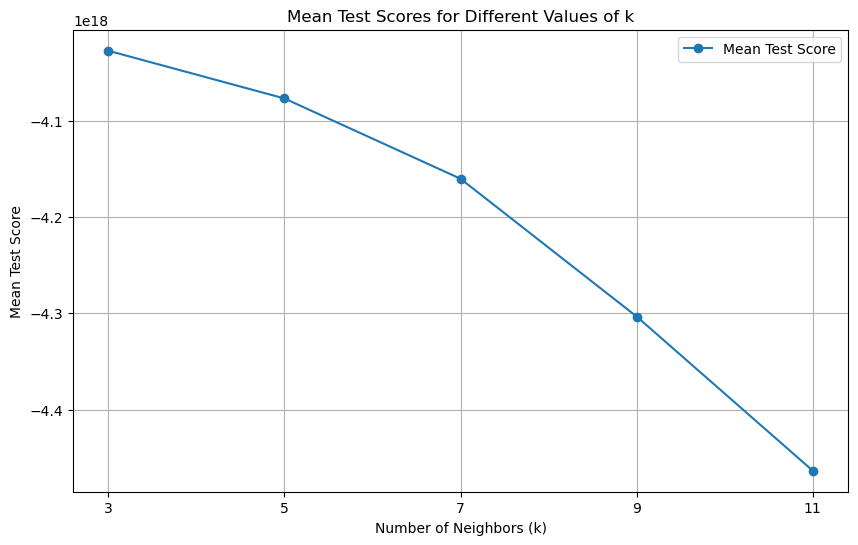

In [65]:
# Lấy ra các điểm số thử nghiệm và kết quả tương ứng từ grid search
params = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Trích xuất giá trị k từ các tham số
k_values = [param['n_neighbors'] for param in params]

# Vẽ biểu đồ line plot của MSE trên tập kiểm tra
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, label='Mean Test Score', marker='o')
plt.title('Mean Test Scores for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.legend()
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [66]:
# Lấy ra số lân cận tốt nhất
best_k = grid_search.best_params_['n_neighbors']
print("Best number of neighbors:", best_k)

Best number of neighbors: 3


In [67]:
# Sử dụng số lân cận tốt nhất để khởi tạo mô hình KNN
best_knn = KNeighborsRegressor(n_neighbors=best_k)

In [68]:
# Huấn luyện mô hình với số lân cận tốt nhất trên toàn bộ tập huấn luyện
best_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

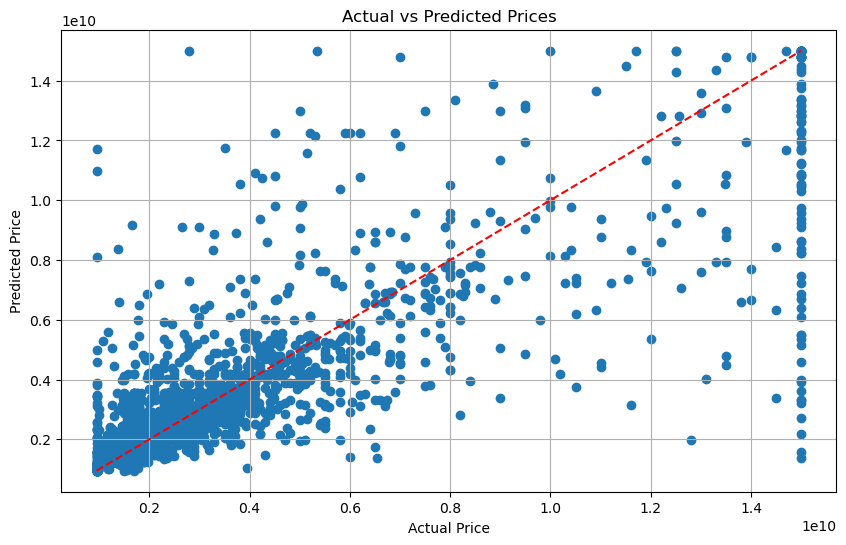

In [69]:
# Vẽ biểu đồ so sánh giá trị dự đoán và giá trị thực tế trên tập kiểm tra
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

In [70]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [71]:
test_score = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)

print("Test Score:", test_score)
print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)

Test Score: 0.6797758323251535
MAE: 1022621073.0974212
MAPE: 29.36511275488159
MSE: 4.059272888150281e+18


### Test score
Điểm số trên tập kiểm tra của mô hình của bạn là 0.6779. Điều này có nghĩa là mô hình của bạn có khả năng dự đoán giá trị của các mẫu trong tập kiểm tra một cách khá chính xác. Tuy nhiên, điểm số này không phải là hoàn hảo với giá trị gần 1, điều này có thể ngụ ý rằng vẫn còn không ít sai số trong dự đoán. Điểm số có thể được giải thích như sau:
Điểm số của 0.6779 là một dấu hiệu tích cực, nhưng vẫn có không gian để cải thiện. Có thể muốn thử nghiệm với các siêu tham số khác nhau của mô hình KNN hoặc thử nghiệm với các mô hình khác để tìm ra một mô hình tốt hơn.

### MAE
Giá trị MAE của mô hình của bạn là 980,476,508.90, đây là một con số rất lớn. MAE đo lường độ lớn trung bình của các sai số tuyệt đối giữa dự đoán của mô hình và giá trị thực tế trên tập kiểm tra. Trong trường hợp trên, giá trị này là rất cao, ngụ ý rằng mô hình của bạn có xu hướng dự đoán rất xa so với giá trị thực tế trên tập kiểm tra. Một MAE thấp hơn sẽ cho thấy mô hình có khả năng dự đoán gần với giá trị thực tế hơn. Tuy nhiên, với MAE cao như vậy, điều này ngụ ý rằng mô hình cần được cải thiện.


### MAPE
Giá trị MAPE của mô hình là 28.26%, điều này có nghĩa là trung bình mỗi dự đoán của mô hình sai số khoảng 28.26% so với giá trị thực tế trên tập kiểm tra. MAPE là một phép đo phổ quát về độ lớn của sai số tuyệt đối, tính bằng phần trăm, so với giá trị thực tế. Giá trị MAPE càng thấp thì mô hình càng chính xác, vì nó cho thấy tỷ lệ của sai số so với giá trị thực tế là nhỏ. Với giá trị MAPE là 28.26%, đây là một tỷ lệ trung bình, ngụ ý rằng mô hình của bạn dự đoán sai lệch đáng kể so với giá trị thực tế trên tập kiểm tra.


### MSE
Giá trị MAPE của mô hình là 28.26%, điều này có nghĩa là trung bình mỗi dự đoán của mô hình sai số khoảng 28.26% so với giá trị thực tế trên tập kiểm tra. MAPE là một phép đo phổ quát về độ lớn của sai số tuyệt đối, tính bằng phần trăm, so với giá trị thực tế. Giá trị MAPE càng thấp thì mô hình càng chính xác, vì nó cho thấy tỷ lệ của sai số so với giá trị thực tế là nhỏ. Với giá trị MAPE là 28.26%, đây là một tỷ lệ trung bình, ngụ ý rằng mô hình của bạn dự đoán sai lệch đáng kể so với giá trị thực tế trên tập kiểm tra.
ọng.) so với MAE.

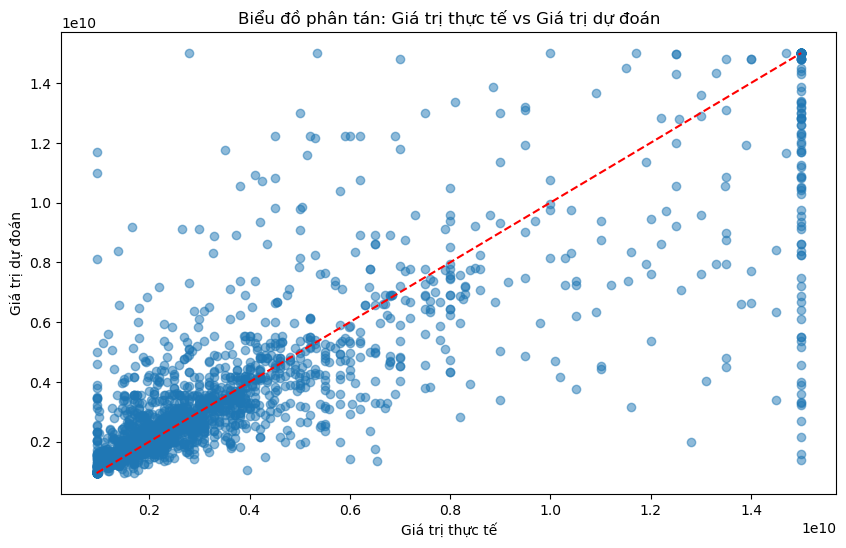

In [72]:
# Vẽ biểu đồ phân tán cho giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ phân tán: Giá trị thực tế vs Giá trị dự đoán")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


Biểu đồ này là biểu đồ phân tán so sánh giữa giá trị thực tế và giá trị dự đoán. Dưới đây là một số nhận xét về biểu đồ:

Đường xu hướng: Đường màu đỏ là đường y = x, biểu thị nơi mà giá trị thực tế và giá trị dự đoán bằng nhau. Nếu các điểm nằm trên hoặc gần đường này, mô hình dự đoán đang hoạt động tốt.

Phân tán dữ liệu: Dữ liệu phân tán khá rộng rãi, với nhiều điểm nằm xa đường y = x. Điều này cho thấy mô hình dự đoán có sai số khá lớn đối với nhiều giá trị.

Khuynh hướng lệch: Có vẻ như có một xu hướng lệch dọc theo trục y. Nhiều điểm có giá trị dự đoán cao hơn giá trị thực tế, đặc biệt là với các giá trị thực tế lớn. Điều này cho thấy mô hình có thể đang dự đoán cao hơn so với thực tế trong một số trường hợp.

Tập trung dữ liệu: Có một tập hợp lớn các điểm tập trung ở góc dưới bên trái của biểu đồ. Điều này có thể cho thấy rằng phần lớn dữ liệu có giá trị thực tế và dự đoán nhỏ, hoặc mô hình hoạt động tốt hơn với các giá trị nhỏ.

Ngoại lệ: Có nhiều điểm nằm xa đường y = x, có thể được coi là các ngoại lệ (outliers). Những điểm này có thể là kết quả của các giá trị thực tế rất cao hoặc thấp không phù hợp với xu hướng chung của dữ liệu.

Tóm lại, biểu đồ cho thấy mô hình có một số khả năng dự đoán, nhưng cũng có nhiều trường hợp dự đoán sai lệch, đặc biệt là với các giá trị lớn. Cần xem xét lại mô hình và có thể cải thiện để giảm bớt sai số trong dự đoán.